In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
data_ssp126 = xr.open_dataset("/home/ostronet/kurser/see110/sim_outputs/output_ssp126.nc",engine="netcdf4")
data_ssp370 = xr.open_dataset("/home/ostronet/kurser/see110/sim_outputs/output_ssp370.nc",engine="netcdf4")
data_ssp585 = xr.open_dataset("/home/ostronet/kurser/see110/sim_outputs/output_ssp585.nc",engine="netcdf4")

In [38]:
print(data_ssp126.data_vars)

Data variables:
    volume                        (time, rgi_id) float32 87kB ...
    volume_bsl                    (time, rgi_id) float32 87kB ...
    volume_bwl                    (time, rgi_id) float32 87kB ...
    area                          (time, rgi_id) float32 87kB ...
    length                        (time, rgi_id) float32 87kB ...
    calving                       (time, rgi_id) float32 87kB ...
    calving_rate                  (time, rgi_id) float32 87kB ...
    off_area                      (time, rgi_id) float32 87kB ...
    on_area                       (time, rgi_id) float32 87kB ...
    melt_off_glacier              (time, rgi_id) float32 87kB 5.917e+06 ... nan
    melt_on_glacier               (time, rgi_id) float32 87kB 6.463e+10 ... nan
    liq_prcp_off_glacier          (time, rgi_id) float32 87kB 1.541e+06 ... nan
    liq_prcp_on_glacier           (time, rgi_id) float32 87kB 1.012e+10 ... nan
    snowfall_off_glacier          (time, rgi_id) float32 87kB ...
    

In [39]:
monthly_melt = data_ssp126["melt_on_glacier_monthly"].sum(dim="rgi_id")

In [33]:
#Årlig plot
total_runoff_y_ssp126 = 1e-9*(data_ssp126["melt_off_glacier"].sum(dim="rgi_id") + data_ssp126["melt_on_glacier"].sum(dim="rgi_id") + data_ssp126["liq_prcp_off_glacier"].sum(dim="rgi_id") + data_ssp126["liq_prcp_on_glacier"].sum(dim="rgi_id"))
total_runoff_y_ssp370 = 1e-9*(data_ssp370["melt_off_glacier"].sum(dim="rgi_id") + data_ssp370["melt_on_glacier"].sum(dim="rgi_id") + data_ssp370["liq_prcp_off_glacier"].sum(dim="rgi_id") + data_ssp370["liq_prcp_on_glacier"].sum(dim="rgi_id"))
total_runoff_y_ssp585 = 1e-9*(data_ssp585["melt_off_glacier"].sum(dim="rgi_id") + data_ssp585["melt_on_glacier"].sum(dim="rgi_id") + data_ssp585["liq_prcp_off_glacier"].sum(dim="rgi_id") + data_ssp585["liq_prcp_on_glacier"].sum(dim="rgi_id"))



total_runoff_y_ssp126 = total_runoff_ssp126[:-1].rolling(time=10).mean()
total_runoff_y_ssp370 = total_runoff_ssp370[:-1].rolling(time=10).mean()
total_runoff_y_ssp585 = total_runoff_ssp585[:-1].rolling(time=10).mean()



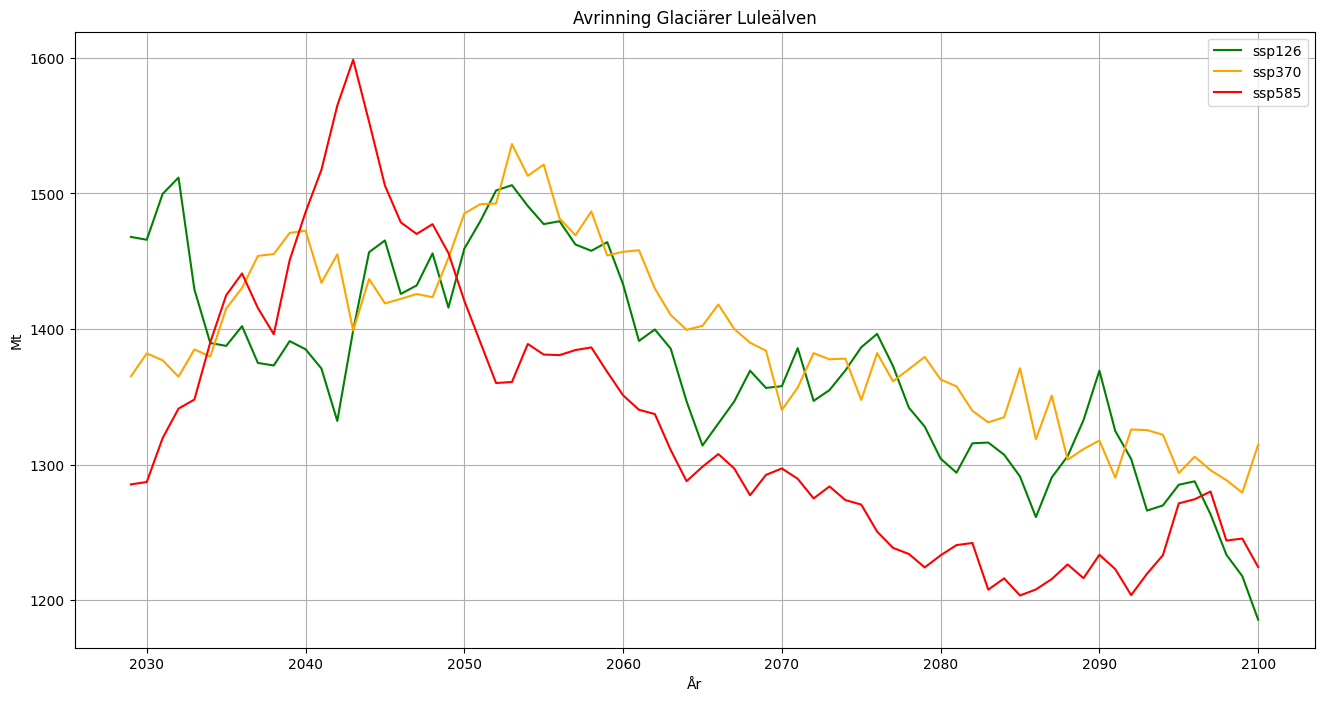

In [46]:
fig, ax = plt.subplots(figsize=(16,8))
total_runoff_ssp126.plot(ax=ax, color="g",label="ssp126")
total_runoff_ssp370.plot(ax=ax,color="orange",label="ssp370")
total_runoff_ssp585.plot(ax=ax,color="r",label="ssp585")

plt.title("Avrinning Glaciärer Luleälven"); plt.ylabel("Mt"); plt.xlabel("År")
plt.legend(); plt.grid()
plt.savefig("total_avrinning_alla_scenarion")
plt.show()

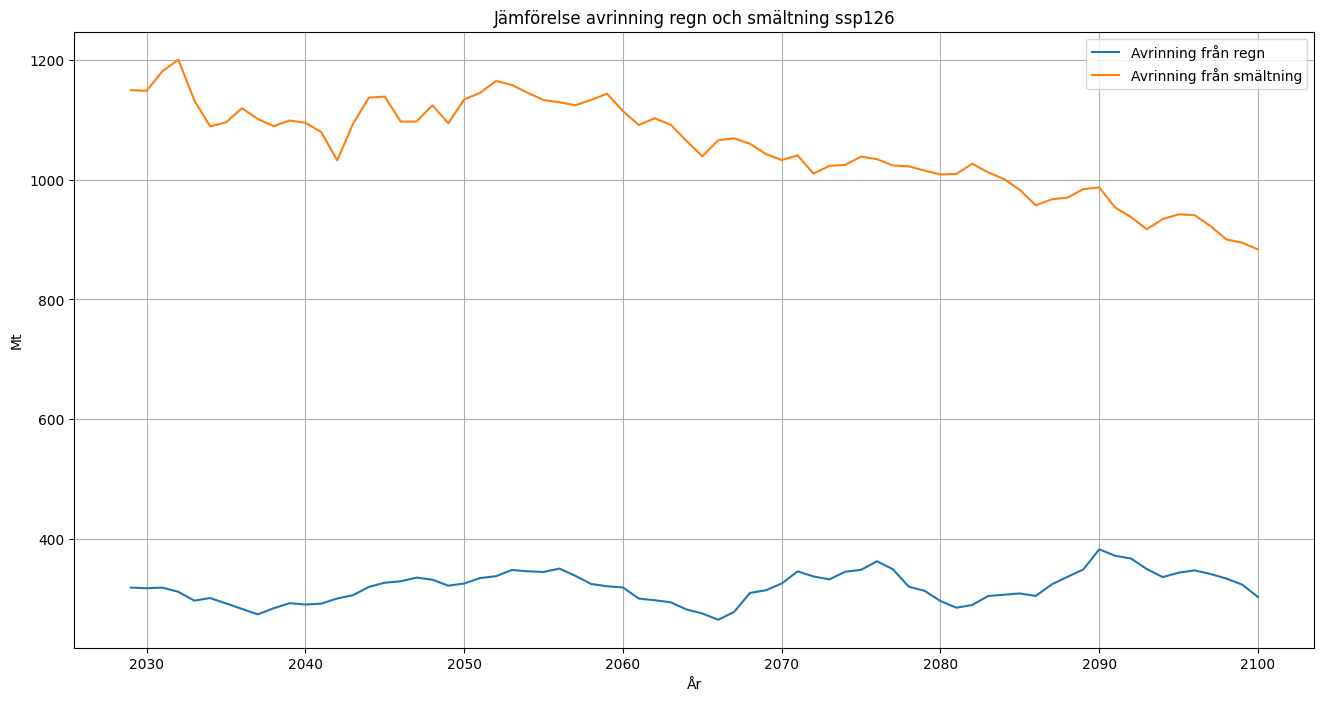

In [57]:
runoff_regn = 1e-9*(data_ssp126["liq_prcp_off_glacier"].sum(dim="rgi_id") + data_ssp126["liq_prcp_on_glacier"].sum(dim="rgi_id"))
runoff_melt = 1e-9*(data_ssp126["melt_off_glacier"].sum(dim="rgi_id") + data_ssp126["melt_on_glacier"].sum(dim="rgi_id"))

runoff_melt = runoff_melt[:-1].rolling(time=10).mean()
runoff_regn = runoff_regn[:-1].rolling(time=10).mean()

fig, ax = plt.subplots(figsize=(16,8))
runoff_regn.plot(ax=ax, label="Avrinning från regn")
runoff_melt.plot(ax=ax, label="Avrinning från smältning")
plt.legend(); plt.grid(); plt.title("Jämförelse avrinning regn och smältning ssp126"); plt.ylabel("Mt"); plt.xlabel("År")
plt.savefig("Jämförelse_ssp126")
plt.show()

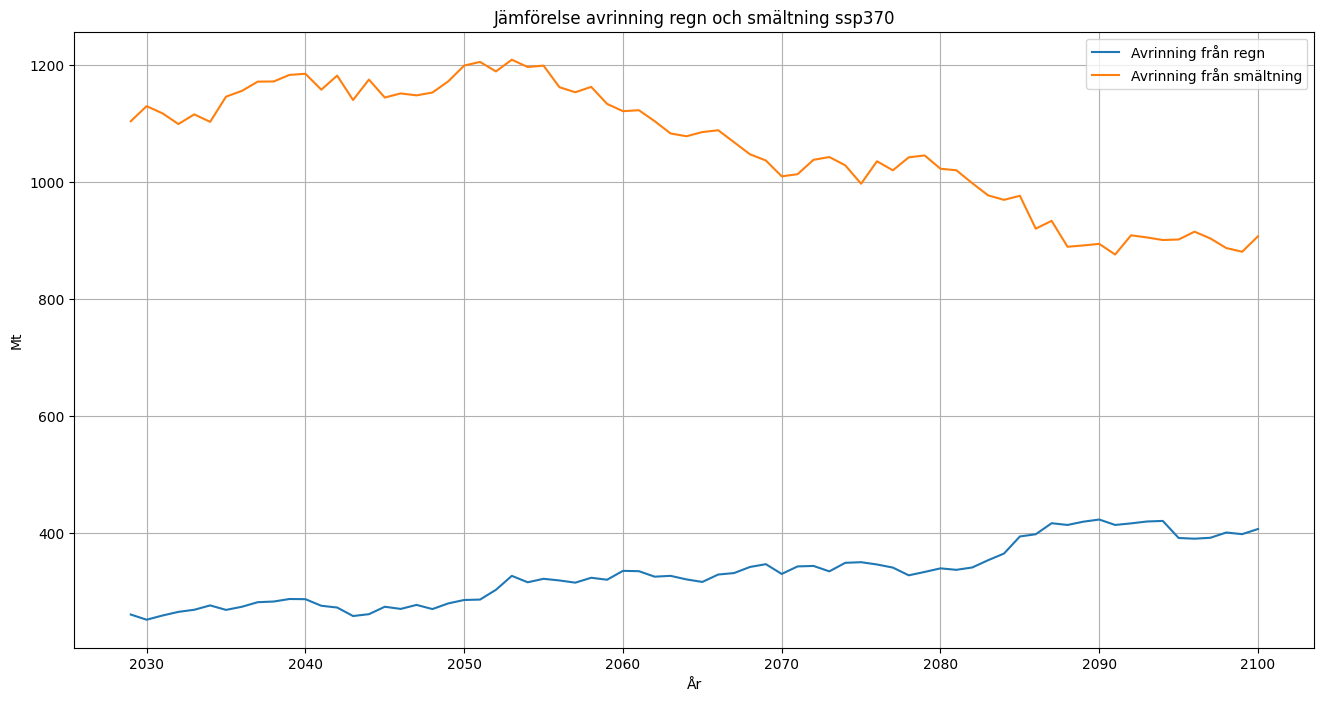

In [58]:
runoff_regn = 1e-9*(data_ssp370["liq_prcp_off_glacier"].sum(dim="rgi_id") + data_ssp370["liq_prcp_on_glacier"].sum(dim="rgi_id"))
runoff_melt = 1e-9*(data_ssp370["melt_off_glacier"].sum(dim="rgi_id") + data_ssp370["melt_on_glacier"].sum(dim="rgi_id"))

runoff_melt = runoff_melt[:-1].rolling(time=10).mean()
runoff_regn = runoff_regn[:-1].rolling(time=10).mean()

fig, ax = plt.subplots(figsize=(16,8))
runoff_regn.plot(ax=ax, label="Avrinning från regn")
runoff_melt.plot(ax=ax, label="Avrinning från smältning")
plt.legend(); plt.grid(); plt.title("Jämförelse avrinning regn och smältning ssp370"); plt.ylabel("Mt"); plt.xlabel("År")
plt.savefig("Jämförelse_ssp370")
plt.show()

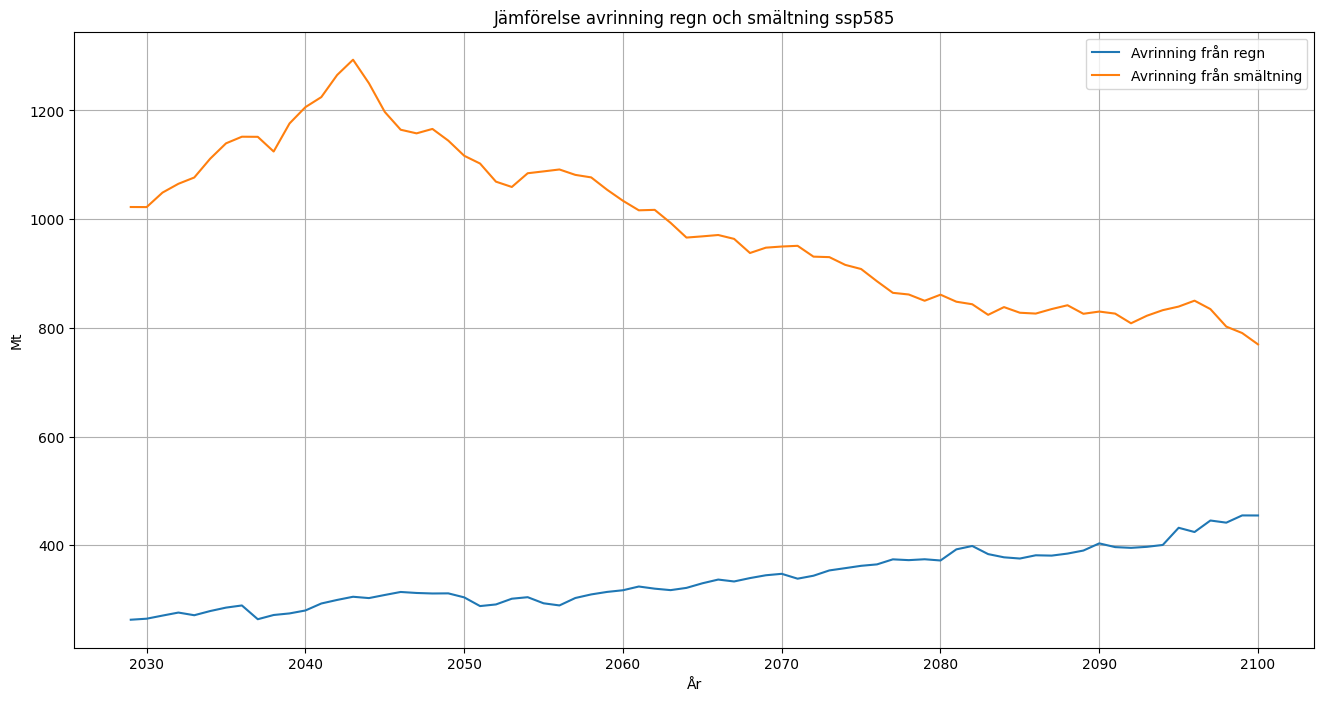

In [59]:
runoff_regn = 1e-9*(data_ssp585["liq_prcp_off_glacier"].sum(dim="rgi_id") + data_ssp585["liq_prcp_on_glacier"].sum(dim="rgi_id"))
runoff_melt = 1e-9*(data_ssp585["melt_off_glacier"].sum(dim="rgi_id") + data_ssp585["melt_on_glacier"].sum(dim="rgi_id"))

runoff_melt = runoff_melt[:-1].rolling(time=10).mean()
runoff_regn = runoff_regn[:-1].rolling(time=10).mean()

fig, ax = plt.subplots(figsize=(16,8))
runoff_regn.plot(ax=ax, label="Avrinning från regn")
runoff_melt.plot(ax=ax, label="Avrinning från smältning")
plt.legend(); plt.grid(); plt.title("Jämförelse avrinning regn och smältning ssp585"); plt.ylabel("Mt"); plt.xlabel("År")
plt.savefig("Jämförelse_ssp585")
plt.show()